# House Price Prediction

## Project Goal


The goal of this project is to build a machine learning model that predicts house prices based on factors such as location, size, number of rooms, and other features. This helps users estimate property value accurately using data-driven predictions.

## Load Module/Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


## Load Dataset

In [2]:
train_data_path =r"D:\Projects\Python\HousePricePrediction\Data\train.csv"
test_data_path = r"D:\Projects\Python\HousePricePrediction\Data\test.csv"
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)
print("Shape of Train Data :",df_train.shape)
print("Shape of Test Data :",df_test.shape)

Shape of Train Data : (1460, 81)
Shape of Test Data : (1459, 80)


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
# df_train.head()


In [4]:
# df_test.head()

 ## Know Your Data

## Data Integrity

In [5]:
df = pd.concat([df_train, df_test])
# print("The Dimension of the Integrated Data is : ", df.shape)
# df.head(5)

In [6]:
# df.tail(5)

## Information of Data

In [7]:
# df.info()
null_percent = df.isnull().sum()/df.shape[0] *100
# print("Features with the most Null Percentages: ",null_percent.sort_values(ascending=False))

In [8]:
int_features = df.select_dtypes(include = ["int64"]).columns
print("Total number of integer feature is :",int_features.shape[0])
print("List of Integer feature : ", int_features.tolist())

Total number of integer feature is : 26
List of Integer feature :  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [9]:
float_features = df.select_dtypes(include = ["float64"]).columns
print("Total number of Float features are :",float_features.shape[0])
print("List of Float Features are:",float_features.tolist())

Total number of Float features are : 12
List of Float Features are: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [10]:
obj_features = df.select_dtypes(include = ["object"]).columns
print("Total number of Float features are :",obj_features.shape[0])
print("List of Float Features are:",obj_features.tolist())

Total number of Float features are : 43
List of Float Features are: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the Statstical Information

In [11]:
# df.describe()

## Handling Missing Value

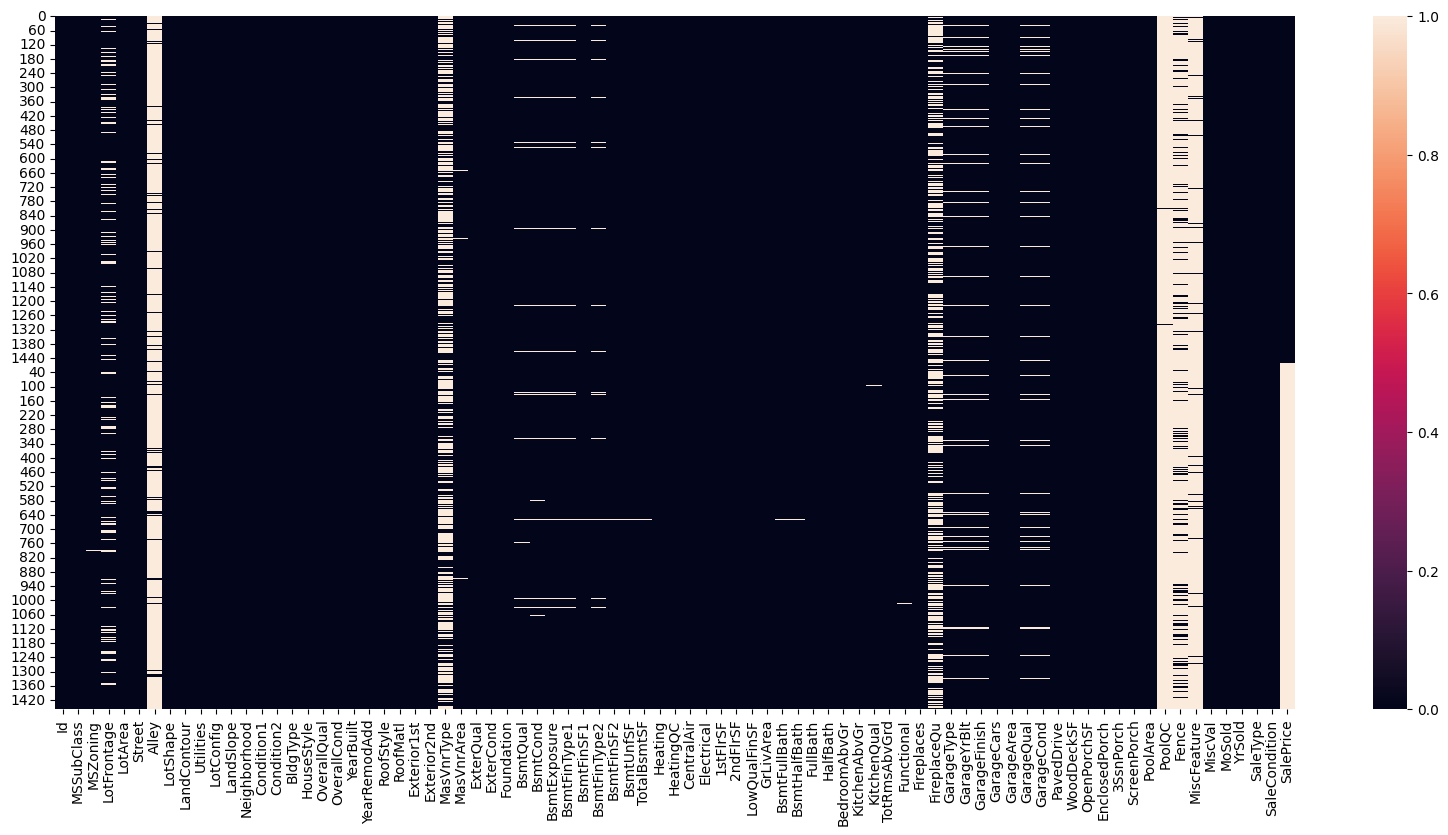

In [12]:
plt.figure(figsize = (20,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_images/heatmap_DF_of_null_values.png")

In [13]:
none_cols = [
    'Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
    'PoolQC','Fence','MiscFeature','MasVnrType'
]

for col in none_cols:
    if col in df_train.columns:
        df_train[col] = df_train[col].fillna("None")
    if col in df_test.columns:
        df_test[col] = df_test[col].fillna("None")

# 2) Numeric columns where NaN means 0
zero_cols = [
    'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
    'BsmtFullBath','BsmtHalfBath',
    'GarageCars','GarageArea','MasVnrArea'
]

for col in zero_cols:
    if col in df_train.columns:
        df_train[col] = df_train[col].fillna(0)
    if col in df_test.columns:
        df_test[col] = df_test[col].fillna(0)

# 3) LotFrontage -> median per Neighborhood
for df in [df_train, df_test]:
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'] \
                          .transform(lambda x: x.fillna(x.median()))

# 4) Remaining missing values -> mode (categorical) / median (numerical)
for df in [df_train, df_test]:
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object':
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna(df[col].median())

# Quick check
print("Max NA in df_train:", df_train.isnull().sum().max())
print("Max NA in df_test :", df_test.isnull().sum().max())


Max NA in df_train: 0
Max NA in df_test : 0


## LOG Transformation (to handle skewed data, convert non-linear relationships into linear ones, and meet model assumptions (like normality and constant variance))


In [14]:

y = np.log1p(df_train['SalePrice'])


X_train_full = df_train.drop(['SalePrice'], axis=1)


X_test_full = df_test.copy()


In [15]:
## Combine + One-Hot Encode Categorical Features

In [16]:
# Drop Id (not a useful feature)
X_train_full = X_train_full.drop('Id', axis=1)
X_test_full  = X_test_full.drop('Id', axis=1)

# Combine for consistent encoding
full_data = pd.concat([X_train_full, X_test_full], axis=0)

# One-hot encoding for all categorical features
full_data = pd.get_dummies(full_data, drop_first=True)

# Split back into train and test matrices
X = full_data.iloc[:len(df_train), :]
X_test_final = full_data.iloc[len(df_train):, :]

X.shape, X_test_final.shape


((1460, 259), (1459, 259))

## Train–Validation Split & Train Linear Regression Model

In [17]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_tr.shape, X_val.shape

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_tr_scaled, y_tr)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluate the Model (RMSE and R²)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score


y_val_pred_log = lin_reg.predict(X_val_scaled)

# Metrics in log space
rmse_log = np.sqrt(mean_squared_error(y_val, y_val_pred_log))
r2 = r2_score(y_val, y_val_pred_log)

print("Validation RMSE (log SalePrice):", rmse_log)
print("Validation R²:", r2)

# Metrics in original price scale
y_val_actual = np.expm1(y_val)
y_val_pred   = np.expm1(y_val_pred_log)

rmse_actual = np.sqrt(mean_squared_error(y_val_actual, y_val_pred))
print("Validation RMSE (actual SalePrice):", rmse_actual)

##  Cross Validation..(4 for train 1 for test )


from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

lin_reg_cv = make_pipeline(StandardScaler(), LinearRegression())

cv_scores = cross_val_score(
    lin_reg_cv, X, y,
    cv=5,
    scoring='neg_mean_squared_error'
)

rmse_scores = np.sqrt(-cv_scores)
print("CV RMSE for each fold:", rmse_scores)
print("Mean CV RMSE:", rmse_scores.mean())
print("Std CV RMSE :", rmse_scores.std())
print("Model Accuracy :", r2*100)

print("Zero mean",np.mean(X_tr_scaled, axis=0)[:10])
print("Unit Variance" , np.std(X_tr_scaled, axis=0)[:10])




Validation RMSE (log SalePrice): 0.17339778921422966
Validation R²: 0.8388798348279598
Validation RMSE (actual SalePrice): 25466.336610904928
CV RMSE for each fold: [0.27134676 0.16522502 0.17325925 0.11135696 0.19051468]
Mean CV RMSE: 0.18234053482435109
Std CV RMSE : 0.05177451766355732
Model Accuracy : 83.88798348279597
Zero mean [ 6.99592591e-17 -1.82502415e-16  2.28128019e-17 -5.17090176e-17
 -2.28128019e-16 -1.41743542e-15  4.65381158e-15 -4.56256038e-18
  6.46362720e-18 -4.41047503e-17]
Unit Variance [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Train Final Model on Full Training Data & Predict on Test Data 

In [19]:
# Scale full training data
X_scaled = scaler.fit_transform(X)

# Train final model
final_lin_reg = LinearRegression()
final_lin_reg.fit(X_scaled, y)

# Scale test set using same scaler
X_test_scaled = scaler.transform(X_test_final)

# Predict
test_pred_log = final_lin_reg.predict(X_test_scaled)

# Convert back to normal prices
test_pred = np.expm1(test_pred_log)


## Create Submission

 File saved as: PredictedOutput.csv


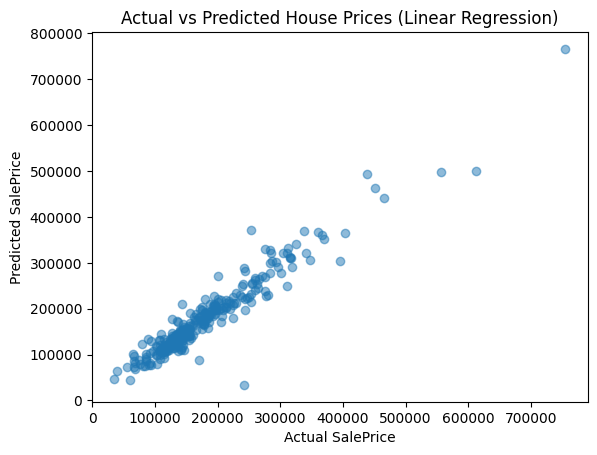

In [20]:
submission = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': test_pred
})

submission.to_csv("PredictedOutput.csv", index=False)


print(" File saved as: PredictedOutput.csv")


plt.scatter(y_val_actual, y_val_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.show()




## Web App (Streamlit)

In [21]:
import pickle
from sklearn.linear_model import LinearRegression 

final_model = LinearRegression()
final_model.fit(X_scaled, y)  

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(final_model, f)

# Save scaler 
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save column names for web app
with open("columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)
